In [ ]:
%matplotlib inline

In [ ]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.animation as animation
import random
from IPython.display import HTML  # for embedded matplotlib animation
from math import *

matplotlib.rc('animation', html='html5')

In [ ]:
# import matplotlib.pyplot as plt
# import numpy as np

# # Assuming your matrix is represented as a NumPy array
# matrix = np.array([[1, 1, 2], [1, 2, 1], [2, 1, 1]])

# # Define a colormap for the values 0, 1, and 2
# cmap = plt.get_cmap('viridis', 5)  # 'viridis' is just an example colormap; choose any colormap you prefer

# # Create a figure and axis without displaying it
# fig, ax = plt.subplots()
# ax.imshow(matrix, cmap=cmap, vmin=0, vmax=5)

# # Turn off axis labels and ticks
# ax.set_xticks([])
# ax.set_yticks([])

# # Show the colored grid
# plt.show()


Initial thought was to implement a random distribution for children and adult in the population but then it would just increase the number of experiements I had to perform to get my average correct as there would be almost $2^{mn}$ possibilities of the initial grid. So then I sought out for how the population would be distributed in the grid and I finally assigned the following population distribution.

The following are the ideas for implementing our simulation for SIR using ideas of cellular automata


Varying population density\
children and adult population\
Introducing deaths




In [ ]:
# global m,n
# n=10
# m=50

In [ ]:
def initbar(columns,rows):
    m=0
    matrix= np.ones((columns, rows))
    # for j in np.arange(24,50,1):
    #     m+=1
    #     for i in np.arange(0,10,1):
    #       m+=j
    #       if(m%2==0):
    #         matrix[j,i]=0
    return matrix

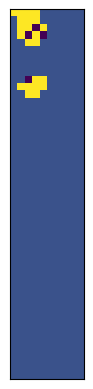

In [ ]:
cmap = plt.get_cmap('viridis', 5)
fig, ax = plt.subplots()
ax.imshow(matrix, cmap=cmap, vmin=0, vmax=5)

ax.set_xticks([])
ax.set_yticks([])
plt.show()

In [ ]:
def popdistribution(matrix):
  for i in range(len(matrix)):
    for j in range(len(matrix[0])):
      if (matrix[i][j]==1):
        if(i%2==0 and j%2==0):
          matrix[i][j]=2       # children
  return matrix

In [ ]:
def infected(x,y,m):
  #in the matrix m, x,y are the infected people
  k=len(x)
  for i in range(k):
      m[x[i]][y[i]]=3
  return m

In [ ]:
def infection_spreads(matrix):
  n=len(matrix)
  m=len(matrix[0])
  matrix1=matrix
  for i in range(0,n):
    for j in range(0,m):
      inf=0
      if(matrix[i][j]<2 and matrix[i][j]>0):
        #code for adult
          if( j+1<m and matrix[i][j+1]==3):
              inf+=1
          if(j-1>=0 and matrix[i][j-1]==3):
              inf+=1
          if(i+1<n and matrix[i+1][j]==3):
              inf+=1
          if(i-1>=0 and matrix[i-1][j]==3):
              inf+=1
          if(inf==1):
            # r=random.random()
            # if(r<0.2):
              matrix1[i][j]=3
          elif(inf==2):
            # r=random.random()
            # if(r<0.36):
              matrix1[i][j]=3
          elif(inf==3):
            # r=random.random()
            # if(r<0.488):
              matrix1[i][j]=3
          elif(inf==4):
            # r=random.random()
            # if(r<0.6):
              matrix1[i][j]=3
      if (matrix[i][j]==2):
        #code for children
          if( j+1<m and matrix[i][j+1]==3):
              inf+=1
          if(j-1>=0 and matrix[i][j-1]==3):
              inf+=1
          if(i+1<n and matrix[i+1][j]==3):
              inf+=1
          if(i-1>=0 and matrix[i-1][j]==3):
              inf+=1
          if(inf==0):
            continue
          if(inf==1):
            r=random.random()
            if(r<0.1):
              matrix1[i][j]=3
          elif(inf==2):
            r=random.random()
            if(r<0.19):
              matrix1[i][j]=3
          elif(inf==3):
            r=random.random()
            if(r<0.271):
                 matrix1[i][j]=3
          elif(inf==4):
            r=random.random()
            if(r<0.344):
              matrix1[i][j]=3
      if(matrix[i][j]==3):
        r=random.random()
        if(r<0.1):      # 10 percent chances the person will die
          matrix1[i][j]=0
        if(r>0.3):        # 70 percent chances the person will recover
          matrix1[i][j]=4 #recovered
  return matrix1

In [ ]:
matrix=initbar(50,10)
matrix=popdistribution(matrix)
matrix=infected([1,3,2,3,0,0,0,0,10],[3,4,2,3,0,1,2,3,4,3],matrix)
print(matrix.shape)
print(matrix)
# ax.imshow(matrix, cmap=cmap, vmin=0, vmax=5)

(50, 10)
[[3. 3. 3. 3. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 3. 1. 1. 1. 1. 1. 1.]
 [1. 1. 3. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 3. 3. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 3. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 

In [ ]:
# Iter=100
# for i in range(1,Iter):
#   matrix=infection_spreads(matrix)
# # print(matrix)
# cmap = plt.get_cmap('viridis', 5)
# fig, ax = plt.subplots()
# ax.imshow(matrix, cmap=cmap, vmin=0, vmax=5)
# # Turn off axis labels and ticks
# ax.set_xticks([])
# ax.set_yticks([])
# plt.show()

In [ ]:
# def allgrids(m,k):
#   grids = np.zeros((k, m, n))
#   grids = np.append(grids,m)
#   for i in range(k):
#     bar=infection_spreads(m)
#     grids = np.append(grids,bar)
#   return grids

In [ ]:
def allgrids(m,t):
  bar = m
  grids = np.zeros((t + 1, 50, 10))
  grids[0, :, :] = bar
  for i in range(1, t + 1):
    bar=infection_spreads(bar)
    grids[i, :, :] = bar
  return grids

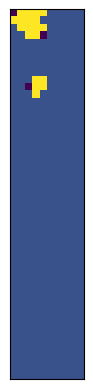

[[0. 4. 4. 4. 4. 1. 1. 1. 1. 1.]
 [4. 4. 4. 4. 1. 1. 1. 1. 1. 1.]
 [1. 4. 4. 4. 4. 1. 1. 1. 1. 1.]
 [1. 1. 4. 4. 0. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 4. 4. 1. 1. 1. 1. 1.]
 [1. 1. 0. 4. 4. 1. 1. 1. 1. 1.]
 [1. 1. 1. 4. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1.

In [ ]:
L=100
grids=allgrids(matrix,L)
cmap = plt.get_cmap('viridis', 5)  # 'viridis' is just an example colormap; choose any colormap you prefer

# Create a figure and axis without displaying it
fig, ax = plt.subplots()
ax.imshow(grids[L,:,:], cmap=cmap, vmin=0, vmax=5)

# Turn off axis labels and ticks
ax.set_xticks([])
ax.set_yticks([])

# Show the colored grid
plt.show()
print(grids[L,:,:])

In [ ]:
Writer = animation.writers['ffmpeg']
writer = Writer(fps=15, metadata=dict(artist='Me'), bitrate=1800)

In [ ]:
# figGray = plt.figure()
# plt.axis('off')
# imGray = plt.imshow(grids[0,:,:], cmap='gray', interpolation='nearest', animated=True)

# # The animation function, called to produce a frame for each generation.
# def updatefig(i, *args):
#     global grids
#     imGray.set_array(grids[i,:,:])
#     return imGray,

# grid_ani = animation.FuncAnimation(figGray, updatefig, save_count = len(grids),
#                                    interval=50, blit=False)
# plt.show()

# # To save the animation, use the command, placed before HTML:
# grid_ani.save('DiffusionGray.mp4', writer=writer)

# HTML(grid_ani.to_html5_video())

In [ ]:
def makeColorGridFloat(grid, maxValue):
    m = grid.shape[0]
    n = grid.shape[1]
    colorGrid = np.zeros((m, n, 3))
    firstEls = grid/maxValue
    colorGrid[:, :, 0] = firstEls
    colorGrid[:, :, 2] = 1.0 - firstEls
    return colorGrid

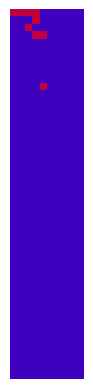

In [ ]:
HOT=4
fig = plt.figure()
plt.axis('off')
im = plt.imshow(makeColorGridFloat(grids[0,:,:], HOT), animated=True)

# The animation function: called to produce a frame for each generation.
def updatefig(i, *args):
    global grids
    im.set_array(makeColorGridFloat(grids[i,:,:], HOT))
    return im,

grid_ani = animation.FuncAnimation(fig, updatefig, save_count = len(grids),
                                   interval=50, blit=False)
plt.show()

# To save the animation, use the command, placed before HTML:
grid_ani.save('DiffusionColor.mp4', writer=writer)

HTML(grid_ani.to_html5_video())